In [1346]:
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer

In [1347]:
train = pd.read_csv('train.csv')

In [1348]:
import matplotlib.pyplot as plt

In [1349]:
import math

In [1350]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [1351]:
nulls= (train.isnull().sum()/train.isnull().count())*100
nulls.sort_values(ascending=False)

belongs_to_collection    79.866667
homepage                 68.466667
tagline                  19.900000
Keywords                  9.200000
production_companies      5.200000
production_countries      1.833333
spoken_languages          0.666667
crew                      0.533333
cast                      0.433333
overview                  0.266667
genres                    0.233333
runtime                   0.066667
poster_path               0.033333
original_language         0.000000
budget                    0.000000
imdb_id                   0.000000
revenue                   0.000000
original_title            0.000000
popularity                0.000000
release_date              0.000000
status                    0.000000
title                     0.000000
id                        0.000000
dtype: float64

# Drop irrelavent columns & columns with more than 50% null values

In [1352]:
train.drop(columns=['id','belongs_to_collection','homepage', 'tagline','imdb_id','poster_path'], inplace=True)

In [1353]:
train.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'title',
       'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

# Fill null values in text columns with 'NA'

In [1354]:
train['genres'].fillna('NA', inplace=True)
train['original_language'].fillna('NA',  inplace=True)
train['Keywords'].fillna('NA', inplace=True)
train['production_countries'].fillna('NA', inplace=True)
train['spoken_languages'].fillna('NA', inplace=True)
train['cast'].fillna('NA', inplace=True)
train['crew'].fillna('NA', inplace=True)
train['production_companies'].fillna('NA', inplace=True)




# Below lines of code written by Devanshee & Mohit

In [1355]:
#train['genres']  = train['genres'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)
train['production_countries'] =train['production_countries'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)
#train['spoken_languages']= train['spoken_languages'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)
train['cast'] = train['cast'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)
train['crew'] = train['crew'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)
train['production_companies'] =train['production_companies'].apply(lambda x: ast.literal_eval(x) if x!= 'NA' else x)




# Cast column

In [1356]:
actor_names=[]

for j in train['cast']:
    if j != 'NA':
        for i in j:
            actor_names.append(i['name'])


In [1357]:
actor_names.sort()

# Extract most common actors 

In [1358]:
actors_Df=pd.DataFrame(actor_names)
count_actors_movies= actors_Df.groupby(0).size().sort_values(ascending=False)
count_actors_movies
common_actors_list=list(pd.DataFrame(count_actors_movies[count_actors_movies>=10]).index)

In [1359]:
count_actors_movies[:10]

0
Samuel L. Jackson    30
Robert De Niro       30
Morgan Freeman       27
Susan Sarandon       25
J.K. Simmons         25
Bruce Willis         25
Liam Neeson          25
Bruce McGill         24
John Turturro        24
Willem Dafoe         23
dtype: int64

In [1360]:
len(common_actors_list)

376

# Column with list of actors in each movie

In [1361]:
train['list_of_actors']= train['cast'].apply(lambda x: list(pd.DataFrame(x)['name']) if (x != 'NA') and ( x!= [] ) else x)

# New column with actors in common actors list


In [1362]:
train['final_actors']= 'Null'

In [1363]:
for i in range(len(train)):
    final_actor=[]
    for j in train.loc[i,'list_of_actors']:

            if j in common_actors_list:
                final_actor.append(j)

    train.at[i,'final_actors'] = final_actor

            

In [1364]:
train.loc[0:10,['cast','list_of_actors','final_actors']]

,cast,list_of_actors,final_actors
0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Adam Scott, John Cusack]"
1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[]
2,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...",[J.K. Simmons]
3,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[]
4,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",[]
5,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[Scott Grimes, Tom Bosley, Rickie Lee Jones, J...",[James Earl Jones]
6,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[Jeffrey Dean Morgan, Natasha Calis, Madison D...",[]
7,"[{'cast_id': 2, 'character': 'Himself', 'credi...","[Samir Khader, Josh Rushing, George W. Bush, H...",[]
8,"[{'cast_id': 1, 'character': 'Long John Silver...","[Tim Curry, Kevin Bishop, Jennifer Saunders, B...",[Tim Curry]
9,"[{'cast_id': 24, 'character': 'Jonathan Steinb...","[Bob Balaban, Christopher Guest, John Michael ...","[John Michael Higgins, Eugene Levy, Jane Lynch..."


In [1365]:
l=train['final_actors']
m=[]
for i in range(len(l)):
    for j in l[i]:
            m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

In [1366]:
final_actors = MultiLabelBinarizer()
final_actors = final_actors.fit_transform(train['final_actors'].values)

final_actors_df = pd.DataFrame(final_actors,columns = k)
train = pd.concat([train,final_actors_df],axis = 1)

In [1367]:
train.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime',
       ...
       'Whoopi Goldberg', 'Will Ferrell', 'Willem Dafoe', 'William Fichtner',
       'William H. Macy', 'William Hurt', 'Winona Ryder', 'Woody Allen',
       'Woody Harrelson', 'Zoe Saldana'],
      dtype='object', length=395)

In [1368]:
train.loc[0:5,['final_actors']]

,final_actors
0,"[Adam Scott, John Cusack]"
1,[]
2,[J.K. Simmons]
3,[]
4,[]
5,[James Earl Jones]


In [1369]:
train.loc[0:5,['cast','list_of_actors','final_actors','John Cusack', 'J.K. Simmons','James Earl Jones']]

,cast,list_of_actors,final_actors,John Cusack,J.K. Simmons,James Earl Jones
0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Adam Scott, John Cusack]",1,0,0
1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",[],0,0,0
2,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...",[J.K. Simmons],0,1,0
3,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[],0,0,0
4,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",[],0,0,0
5,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[Scott Grimes, Tom Bosley, Rickie Lee Jones, J...",[James Earl Jones],0,0,1


# Number of cast in each movie

In [1370]:
train['num_cast']=train['cast'].apply(lambda x: len(x) )

# Number of crew in each movie

In [1371]:
train['num_crew']=train['crew'].apply(lambda x: len(x))

# Production companies column

# Extract list of prod companies

In [1372]:
prod_companies=[]
for i in train['production_companies']:
    for j in i:
        if (j != 'N') and (j!= 'A'):
            prod_companies.append(j['name'])
        

In [1373]:
prod_companies.sort()


In [1374]:
prod_company_Df= pd.DataFrame(prod_companies)
count_production_companies= prod_company_Df.groupby(0).size().sort_values(ascending=False)


In [1375]:
count_production_companies[:10]

0
Warner Bros.                              202
Universal Pictures                        188
Paramount Pictures                        161
Twentieth Century Fox Film Corporation    138
Columbia Pictures                          91
Metro-Goldwyn-Mayer (MGM)                  84
New Line Cinema                            75
Touchstone Pictures                        63
Walt Disney Pictures                       62
Columbia Pictures Corporation              61
dtype: int64

# List of production companies that produced more than 10 movies


In [1376]:
common_prod_companies= list(count_production_companies[count_production_companies > 10].index)
len(common_prod_companies)

69

# Create list of production companies column


In [1377]:
train['list_of_prod_companies']= train['production_companies'].apply(lambda x: list(pd.DataFrame(x)['name']) if (x != 'NA') and ( x!= [] ) else x)

# List of top prod companies , create new column with prod companies who produced more than 10 movies and print null for others

In [1378]:
train['final_companies']='Null'

In [1379]:
for i in range(len(train)):
    final_prod_companies=[]
    for j in train.loc[i,'list_of_prod_companies']:
            if j in common_prod_companies:
                final_prod_companies.append(j)
    train.at[i,'final_companies'] = final_prod_companies

            

In [1380]:
l=train['final_companies']
m=[]
for i in range(len(l)):
    for j in l[i]:
            m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

# Dummy variables

In [1381]:
prod_companies = MultiLabelBinarizer()
prod_companies = prod_companies.fit_transform(train['final_companies'].values)

prod_companies_df = pd.DataFrame(prod_companies,columns = k)
train = pd.concat([train,prod_companies_df],axis = 1)

# Extract common directors list

In [1382]:
directors=[]
for i in train['crew']:
    if i != 'NA':
        for j in i:
            if (j['department'] =='Directing') & (j['job']=='Director'):
                
                directors.append(j['name'])

In [1383]:
directors.sort()


# Consider directors that have directed more than 6 movies, make it a categorical column


In [1384]:
direct_Df=pd.DataFrame(directors)

count_director_movies= direct_Df.groupby(0).size().sort_values(ascending=False)
#count_director_movies
common_directors_list=list(count_director_movies[count_director_movies >= 6].index)
len(common_directors_list)

36

In [1385]:
count_director_movies[:10]

0
Clint Eastwood          11
Ron Howard              11
Steven Spielberg        10
Blake Edwards            9
Woody Allen              9
Michael Bay              8
Francis Ford Coppola     8
Steven Soderbergh        8
Alfred Hitchcock         8
Brian De Palma           8
dtype: int64

# Column with director names

In [1386]:
director = pd.DataFrame(columns=['list_of_directors'])
director

,list_of_directors


# List of director names in a new column

In [1387]:
for j in range(len(train['crew'])):
    if (train['crew'][j] != 'NA') and (train['crew'][j]!= []):
        a= pd.DataFrame(train['crew'][j])
        directors=[]
        for i in range(len(a)):
            #print(a['name'])
            if (a.loc[i,'job']=='Director') & (a.loc[i,'department']=='Directing') :
                directors.append(a.loc[i,'name'])
        director.loc[j,'list_of_directors']= directors



    else:
        director.loc[j,'list_of_directors']='NA'        

In [1388]:
train= pd.concat([train,director], axis=1)

# List of top directors , create new column wih directors who produced more than 6 movies and print null for others


In [1389]:
train['final_director']='Null'

In [1390]:
a= list(train.columns)

In [1391]:
a.sort()

In [1392]:
a

['Aaron Eckhart',
 'Adam Sandler',
 'Adam Scott',
 'Al Pacino',
 'Alec Baldwin',
 'Alfred Molina',
 'Allison Janney',
 'Amanda Peet',
 'Amblin Entertainment',
 'American Zoetrope',
 'Amy Adams',
 'Andy Serkis',
 'Angela Bassett',
 'Anjelica Huston',
 'Anna Kendrick',
 'Anthony Hopkins',
 'Anthony Mackie',
 'Antonio Banderas',
 'Arnold Schwarzenegger',
 'Ashley Judd',
 'BBC Films',
 'Barry Pepper',
 'Ben Affleck',
 'Ben Kingsley',
 'Ben Stiller',
 'Benicio del Toro',
 'Beth Grant',
 'Bette Midler',
 'Bill Hader',
 'Bill Murray',
 'Bill Nighy',
 'Bill Paxton',
 'Bill Pullman',
 'Billy Bob Thornton',
 'Billy Burke',
 'Blumhouse Productions',
 'Bob Gunton',
 'Bobby Cannavale',
 'Brad Dourif',
 'Brad Pitt',
 'Bradley Cooper',
 'Bradley Whitford',
 'Brendan Gleeson',
 'Brian Cox',
 'Brian Dennehy',
 'Brion James',
 'Bruce Campbell',
 'Bruce Greenwood',
 'Bruce McGill',
 'Bruce Willis',
 'Burt Kwouk',
 'Cameron Diaz',
 'Canal+',
 'Canal+ España',
 'Carla Gugino',
 'Carolco Pictures',
 'Cary E

In [1393]:
for i in range(len(train)):
    final_director=[]
    for j in train.loc[i,'list_of_directors']:
            if j in common_directors_list:
                final_director.append(j)
    train.at[i,'final_director'] = final_director

            

In [1394]:
train.loc[0:5,['crew','list_of_directors','final_director']]

,crew,list_of_directors,final_director
0,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",[Steve Pink],[]
1,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",[Garry Marshall],[Garry Marshall]
2,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",[Damien Chazelle],[]
3,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",[Sujoy Ghosh],[]
4,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",[Jong-seok Yoon],[]
5,"[{'credit_id': '52fe46f49251416c9106558b', 'de...",[Hal Sutherland],[]


In [1395]:
l=train['final_director']
m=[]
for i in range(len(l)):
    for j in l[i]:
            m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

# Dummy Variables

In [1396]:
from sklearn.preprocessing import MultiLabelBinarizer
directors_lb = MultiLabelBinarizer()

In [1397]:
X = directors_lb.fit_transform(train['final_director'].values)


In [1398]:
X_Df= pd.DataFrame(X, columns=k)

In [1399]:
train= pd.concat([train, X_Df], axis=1)

# Producers`

# Extract common directors list

In [1400]:
producers=[]
for i in train['crew']:
    if i != 'NA':
        for j in i:
            if (j['department'] =='Production') & (j['job']=='Producer'):
                
                producers.append(j['name'])

In [1401]:
producers.sort()


# Consider producers that have produced more than 10 movies, make it a categorical column


# Column with producer names

In [1402]:
producers_Df=pd.DataFrame(producers)

count_producers_movies= producers_Df.groupby(0).size().sort_values(ascending=False)
#count_director_movies
common_producers_list=list(count_producers_movies[count_producers_movies >= 8].index)
len(common_producers_list)

61

In [1403]:
producer = pd.DataFrame(columns=['list_of_producers'])
producer

,list_of_producers


In [1404]:
for j in range(len(train['crew'])):
    if (train['crew'][j] != 'NA') and (train['crew'][j]!= []):
        a= pd.DataFrame(train['crew'][j])
        producers=[]
        for i in range(len(a)):
            #print(a['name'])
            if (a.loc[i,'job']=='Producer') & (a.loc[i,'department']=='Production'):
                producers.append(a.loc[i,'name'])
        producer.loc[j,'list_of_producers']= producers



    else:
        producer.loc[j,'list_of_producers']='NA'        

In [1405]:
train= pd.concat([train,producer], axis=1)

In [1406]:
train.loc[0:5,['crew','list_of_producers']]

,crew,list_of_producers
0,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",[Andrew Panay]
1,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[Whitney Houston, Mario Iscovich, Debra Martin..."
2,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...","[David Lancaster, Michel Litvak, Jason Blum, H..."
3,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",[Sujoy Ghosh]
4,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",[]
5,"[{'credit_id': '52fe46f49251416c9106558b', 'de...",[]


In [1407]:
train.drop(columns='Clint Eastwood', inplace=True)

# List of top producers , create new column wih directors who produced more than 10 movies and print null for others


In [1408]:
train.drop(columns='Woody Allen', inplace=True)

In [1409]:
train['final_producer']='Null'

In [1410]:
for i in range(len(train)):
    final_producer=[]
    for j in train.loc[i,'list_of_producers']:
            if j in common_producers_list:
                final_producer.append(j)
    train.at[i,'final_producer'] = final_producer

            

In [1411]:
train.loc[0:5,['crew','list_of_producers','final_producer']]

,crew,list_of_producers,final_producer
0,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",[Andrew Panay],[]
1,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[Whitney Houston, Mario Iscovich, Debra Martin...",[]
2,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...","[David Lancaster, Michel Litvak, Jason Blum, H...",[Jason Blum]
3,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",[Sujoy Ghosh],[]
4,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",[],[]
5,"[{'credit_id': '52fe46f49251416c9106558b', 'de...",[],[]


# Dummy variables

In [1412]:
len(common_producers_list)

61

In [1413]:
from sklearn.preprocessing import MultiLabelBinarizer
producers_lb = MultiLabelBinarizer()

In [1414]:
X = producers_lb.fit_transform(train['final_producer'].values)


In [1415]:
l=train['final_producer']
m=[]
for i in range(len(l)):
    for j in l[i]:
            m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

In [1416]:
X_Df= pd.DataFrame(X, columns= k)

In [1417]:
train= pd.concat([train, X_Df], axis=1)

In [1418]:
b= list(train.columns)

In [1419]:
b.sort()

# Drop dummy variables for few actors and directors that have same names and have created duplicate dummy variables

In [1420]:
train= train.drop(columns=['Ivan Reitman', 'Luc Besson', 'Ridley Scott', 'Robert De Niro','Ron Howard'], axis=1)

# Below lines of code written by Prashant and Shashank

# Genres column

In [1421]:
a= list(train.columns)

In [1422]:
set([x for x in a if a.count(x) > 1])


{'Brad Pitt', 'Michael Mann', 'Peter Jackson', 'Steven Spielberg'}

In [1423]:
train.drop(columns=['Brad Pitt','Michael Mann','Peter Jackson','Steven Spielberg'], inplace=True)

In [1424]:
for i in range(len(train)):
    if train['genres'][i]!='NA':
    
        t=ast.literal_eval(train['genres'][i])
        l=len(t)
        m = []
        for j in range(l):
            x=ast.literal_eval(train['genres'][i])[j]
            m.append(x['name'])
            train.at[i,'genres_list'] = m
            print(i)
    else:
        pass

0
1
1
1
1
2
3
3
4
4
5
5
5
6
6
7
8
8
8
8
8
9
9
10
11
12
13
13
14
14
14
14
15
15
15
16
16
17
17
18
18
19
19
19
20
20
20
21
21
22
22
23
23
23
24
24
25
25
25
25
26
26
26
26
27
27
27
28
29
29
29
29
30
30
31
31
31
32
32
32
33
34
34
34
34
35
35
35
36
36
37
37
37
37
38
39
39
40
40
41
41
42
43
44
44
45
45
45
45
45
46
46
46
46
47
47
47
47
48
48
49
49
49
49
50
50
50
51
51
52
52
53
53
53
54
55
55
55
56
56
57
57
57
58
58
59
59
59
60
60
60
61
62
62
62
62
63
63
64
64
65
66
66
67
68
68
69
69
69
69
70
70
70
70
71
72
72
73
73
74
74
75
75
76
76
76
77
78
78
78
78
79
79
80
80
80
80
81
81
81
82
82
82
82
83
83
84
84
85
85
85
85
85
85
86
87
87
87
87
88
88
89
89
89
89
90
90
91
92
92
92
92
93
93
94
94
94
95
96
96
96
96
97
97
98
98
98
98
99
99
99
100
100
100
100
100
101
101
102
102
102
102
103
104
105
106
107
107
107
107
108
108
108
109
109
109
110
110
110
110
111
111
111
112
112
112
112
112
113
113
113
114
114
114
115
115
116
117
117
117
118
118
119
119
119
120
120
120
120
121
121
121
121
122
122
122
122
122
12

969
969
970
970
971
971
972
972
972
972
973
974
974
974
975
975
976
976
977
978
978
978
978
978
979
979
980
980
980
980
981
981
981
982
982
983
983
983
983
984
984
985
985
986
986
987
988
989
990
990
990
991
992
992
992
993
993
993
993
994
994
994
995
995
995
996
996
996
996
996
997
997
997
998
998
999
999
1000
1000
1000
1001
1001
1002
1002
1002
1002
1003
1004
1004
1005
1005
1005
1005
1006
1007
1008
1008
1008
1009
1009
1009
1009
1009
1010
1011
1011
1012
1012
1012
1013
1014
1014
1014
1014
1015
1015
1015
1016
1016
1016
1017
1017
1017
1018
1018
1018
1019
1019
1019
1020
1021
1021
1021
1022
1023
1023
1023
1023
1024
1025
1025
1026
1026
1027
1028
1028
1028
1029
1029
1029
1030
1030
1031
1031
1031
1032
1032
1032
1032
1033
1034
1034
1035
1036
1037
1037
1037
1038
1038
1038
1038
1039
1039
1040
1040
1041
1041
1041
1041
1041
1042
1042
1042
1042
1043
1043
1044
1044
1044
1045
1045
1045
1045
1045
1046
1046
1047
1047
1047
1047
1047
1048
1049
1049
1049
1050
1050
1050
1050
1050
1051
1051
1052
1052
1052
10

1875
1875
1875
1876
1876
1876
1877
1877
1878
1879
1879
1880
1880
1880
1880
1881
1882
1882
1882
1883
1883
1884
1884
1885
1885
1885
1886
1886
1886
1887
1887
1888
1888
1889
1889
1890
1890
1890
1891
1891
1892
1893
1893
1893
1894
1894
1894
1895
1895
1895
1896
1896
1897
1897
1898
1898
1898
1899
1899
1899
1899
1900
1900
1900
1900
1901
1902
1902
1902
1903
1904
1904
1904
1905
1905
1905
1906
1906
1907
1907
1907
1908
1908
1908
1909
1909
1909
1909
1909
1910
1910
1911
1911
1912
1913
1913
1914
1914
1914
1915
1916
1916
1916
1917
1917
1918
1918
1918
1919
1919
1920
1920
1921
1921
1922
1922
1922
1923
1923
1923
1924
1924
1924
1925
1925
1926
1926
1926
1927
1927
1927
1927
1927
1928
1928
1929
1929
1930
1930
1931
1932
1932
1932
1932
1933
1933
1933
1934
1934
1934
1934
1935
1936
1936
1936
1936
1937
1937
1938
1938
1938
1939
1939
1939
1939
1940
1940
1940
1940
1941
1941
1942
1942
1942
1942
1943
1943
1943
1944
1944
1944
1945
1946
1946
1947
1947
1948
1948
1949
1949
1950
1951
1951
1952
1953
1953
1953
1954
1954
1955


2754
2754
2754
2754
2755
2755
2756
2757
2757
2757
2758
2758
2758
2758
2758
2759
2759
2759
2760
2760
2760
2761
2761
2762
2762
2763
2763
2763
2764
2764
2765
2765
2766
2766
2766
2767
2767
2768
2768
2769
2769
2769
2770
2770
2770
2771
2771
2771
2772
2772
2773
2773
2773
2773
2774
2774
2775
2775
2775
2776
2776
2776
2776
2777
2777
2778
2778
2779
2779
2779
2779
2780
2780
2780
2781
2781
2781
2782
2782
2782
2783
2783
2783
2784
2784
2785
2785
2785
2785
2786
2786
2786
2787
2787
2787
2788
2788
2788
2789
2789
2789
2790
2790
2790
2791
2791
2792
2792
2792
2792
2793
2794
2794
2795
2795
2796
2796
2796
2796
2797
2797
2797
2798
2798
2798
2799
2799
2800
2801
2801
2801
2802
2802
2802
2803
2803
2803
2804
2804
2804
2805
2805
2806
2806
2806
2807
2807
2807
2807
2808
2809
2810
2811
2811
2812
2813
2814
2814
2815
2815
2815
2816
2816
2816
2817
2818
2818
2818
2819
2819
2820
2820
2821
2821
2822
2822
2822
2822
2823
2824
2824
2824
2825
2825
2825
2826
2826
2827
2827
2828
2828
2828
2829
2829
2829
2829
2830
2831
2831
2832


In [1425]:
train['genres_list'].fillna('NA', inplace=True)

In [1426]:
l=train['genres_list']
m=[]
for i in range(len(l)):
    for j in l[i]:
        m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

In [1427]:
genre = MultiLabelBinarizer()
genre_dummy = genre.fit_transform(train['genres_list'].values)

genre_dummy = pd.DataFrame(genre_dummy,columns = k)


In [1428]:
genre_dummy.drop(columns=['A','N'], inplace=True)

In [1429]:
train = pd.concat([train,genre_dummy],axis = 1)

# Spoken languages column

In [1430]:
train['spoken_languages'].fillna('NA',inplace=True)
train['languages_list']='NA'

# Create column containing list of languages

In [1431]:
for i in range(len(train)):
    if train['spoken_languages'][i]!='NA':
    
        t=ast.literal_eval(train['spoken_languages'][i])
        l=len(t)
        m = []
        for j in range(l):
            x=ast.literal_eval(train['spoken_languages'][i])[j]
            m.append(x['name'])
            #print(m)
            #print(i)
            train.at[i,'languages_list'] = m
            #print(train.at[i,'languages_list'])
            
    else:
        pass

In [1432]:
train['num_languages']= train['languages_list'].apply(lambda x: len(x))

In [1433]:
l=train['languages_list']
m=[]
for i in range(len(l)):
    for j in l[i]:
        m.append(j)
k=[]
for i in m:
    if i not in k:
        k.append(i)
k = sorted(k)

# Dummy variables for languages

In [1434]:
languages = MultiLabelBinarizer()
languages_dummy = genre.fit_transform(train['languages_list'].values)

languages_dummy = pd.DataFrame(languages_dummy,columns = k)
train = pd.concat([train,languages_dummy],axis = 1)

In [1435]:
train.drop(columns='A', inplace=True)

# Overview column

In [1436]:
import numpy as np

In [1437]:
# TFIDF for Overview
from sklearn.feature_extraction.text import TfidfVectorizer
vect_word = TfidfVectorizer(max_features=2500, analyzer='word', stop_words='english', ngram_range=(1,3), dtype=np.float32) 
x = vect_word.fit_transform(train['overview'].values.astype('U'))


tfidf = dict(zip(vect_word.get_feature_names(), vect_word.idf_))
tfidf = pd.DataFrame(columns=['title_word_tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['title_word_tfidf']

y=tfidf.sort_values(by=['title_word_tfidf'], ascending=False)

z=y.to_dict()
r=z['title_word_tfidf']

m = []
train['overview'].fillna('NAN',inplace = True)
for i in range(len(train)):
    d = 0
    t=pd.DataFrame(train['overview']).iloc[i,:].str.split(' ')
    u = t.to_list()
    u = u[0]
    for j in u :
        if j in r.keys():
            d= d + r.get(j)
        else:
             pass
    d=d/len(u)
    m.append(d)       
train['overview_vector'] = pd.DataFrame(m)

In [1438]:
train.drop(columns='overview', inplace=True)

In [1439]:
train.drop(columns=['final_actors','final_companies','final_director','final_producer','genres','genres_list','languages_list','list_of_actors','list_of_directors','list_of_prod_companies','list_of_producers'], inplace=True)

# Below lines of code contributed by all team members

# Replace budget values less than 600 with median

In [1440]:
train.loc[train['budget']<600,'budget']=train['budget'].median()

# Normalize budget

In [1441]:
from sklearn.preprocessing import normalize
budget_norm=train['budget']/(np.linalg.norm(train['budget']))

In [1442]:
normalized_budget=pd.DataFrame(budget_norm)

In [1443]:
normalized_budget.rename(columns={'budget':'normalized_budget'}, inplace=True)

In [1444]:
train= pd.concat([train,normalized_budget], axis=1)

In [ ]:
# train.drop(columns='budget', inplace=True)

# Replace runtime with median

In [1445]:
train['runtime'].fillna(train['runtime'].median(),inplace=True)

# Normalize runtime

In [1446]:
from sklearn.preprocessing import normalize
runtime_norm=(train['runtime'])/(np.linalg.norm(train['runtime']))

In [1447]:
normalized_runtime=pd.DataFrame(runtime_norm)

In [1448]:
normalized_runtime.rename(columns={'runtime':'normalized_runtime'}, inplace=True)

In [1449]:
train= pd.concat([train,normalized_runtime], axis=1)

# Drop rows with revenue < 10000

In [1450]:
Low_revenue_count = (train.loc[train['revenue']<10000,'revenue'].index)

In [1451]:
train.drop(Low_revenue_count,inplace = True)

In [1452]:
train.shape

(2908, 624)

# Revenue column is skewed and hence we take its log

In [1453]:
import matplotlib.pyplot as plt

(array([2.54e+03, 2.18e+02, 7.90e+01, 2.40e+01, 1.80e+01, 1.20e+01,
        1.10e+01, 2.00e+00, 1.00e+00, 3.00e+00]),
 array([1.00180000e+04, 1.51964807e+08, 3.03919596e+08, 4.55874386e+08,
        6.07829175e+08, 7.59783964e+08, 9.11738753e+08, 1.06369354e+09,
        1.21564833e+09, 1.36760312e+09, 1.51955791e+09]),
 <a list of 10 Patch objects>)

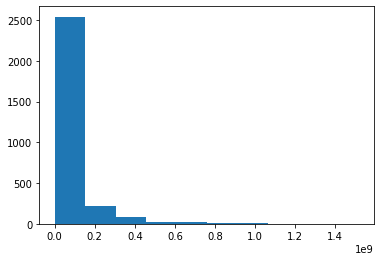

In [1454]:
plt.hist(train['revenue'])

In [1455]:
import numpy as np
train['log_revenue']=np.log1p(train['revenue'])

# Release month dummy variables

In [1456]:
t= pd.to_datetime(train['release_date'])
train['Month'] = t.dt.month

In [1457]:
from sklearn.preprocessing import OneHotEncoder
train= pd.get_dummies(train, columns=['Month'])


# Splitting data 

In [1290]:
# Drop unnecessary columns

In [1458]:
train.drop(columns='revenue',inplace=True)
train.drop(columns='budget', inplace=True)
train.drop(columns='runtime', inplace=True)

In [1459]:
train.drop(columns=['original_language','original_title','popularity','production_companies','production_countries','spoken_languages',
                   'status','title','Keywords','cast','crew'], inplace=True)

In [1460]:
t= pd.to_datetime(train['release_date'])
train['Year'] = t.dt.year

In [1461]:
train.drop(columns='release_date', inplace=True)

In [1462]:
train.drop(columns=['','N'], inplace=True)

In [1463]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train,train['log_revenue'],test_size=0.20,random_state=42)

In [1464]:
X_train.drop(columns = 'log_revenue',inplace = True)
X_test.drop(columns = 'log_revenue',inplace = True)

C:\Users\Devanshee\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Scaling X_train,X_test

In [1465]:
from sklearn.preprocessing import StandardScaler
Sc_x=StandardScaler()

In [1466]:
X_test_scaled=Sc_x.fit_transform(X_test)
X_train_scaled=Sc_x.fit_transform(X_train)

In [1467]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor()
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 100)

In [1468]:
rf.fit(X_train_scaled,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)

In [1469]:
from sklearn.metrics import mean_squared_error

pred_RF = rf.predict(X_test_scaled)

test_set_rmse = (np.sqrt(mean_squared_error(Y_test, pred_RF)))
test_set_rmse

1.5854227102361544

In [1470]:
train.to_csv('We_finally_did_it.csv')